In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [4]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Preprocessing
# check the shape of the data
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN":0,"INLAND":1,"NEAR OCEAN":2,"NEAR BAY":3,"ISLAND":4})

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [13]:
X= df.drop("median_house_value",axis=1)
y= df['median_house_value']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state= 42)
# here we are giving 80 percent data to x_train from X and 80 percent data to y_train from y rest 20 percent for test) 

In [15]:
# convert X and y values to numpy
X= np.array(X)
y= np.array(y)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


In [17]:
# scaling
# created a object 
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [18]:
x_train

array([[0.25809717, 0.50797024, 0.25490196, ..., 0.14635751, 0.28984428,
        0.        ],
       [0.47773279, 0.4357067 , 0.62745098, ..., 0.02844927, 0.20074206,
        0.25      ],
       [0.63663968, 0.16790648, 0.47058824, ..., 0.12465055, 0.21820389,
        0.25      ],
       ...,
       [0.60020243, 0.15621679, 0.80392157, ..., 0.05936524, 0.1792458 ,
        0.        ],
       [0.23380567, 0.53453773, 0.21568627, ..., 0.17365565, 0.33020234,
        0.75      ],
       [0.19433198, 0.55154091, 1.        , ..., 0.10623253, 0.23403125,
        0.75      ]])

In [19]:
#model training and architecture
#sequential helps in creating deep learning model architecture
# model design

model = Sequential([
    #input layer # 1000 is the no. of neuron
    Dense(1000, input_shape= [x_train.shape[1],],activation = 'relu' ), #x_train = 16346, 9  here 16346 = 0 and 9=1(index value)
    #hidden layer 1 # 500 is the number of neurons 
    Dense(500, activation='relu' ),
    #hidden layer 2
    Dense(250, activation='relu'), 
    #output layer
    Dense(1,activation='linear'),
    
])
model.summary()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense (Dense)                 │ (None, 1000)          │       10,000 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 500)           │      500,500 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 250)           │      125,250 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 1)             │          251 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# model compile

model.compile(optimizer='rmsprop',loss='mse', metrics = ['mae'])
# optimizer for regression model used here is rmsprop 
# loss to calculate the error 
# mse : mean squared error y=(actual-predicted)
# metrics mae : mean absolute error
es= EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True)

In [21]:
history = model.fit(x_train,y_train,validation_data = (x_test, y_test),callbacks=[es],epochs=10, batch_size=50, verbose=1)

# es for stopping the model to go towards fitting
# epochs = 10 means this model will train on this data for 10 times

Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 39929315328.0000 - mae: 163410.9688 - val_loss: 11449765888.0000 - val_mae: 84293.1641
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 10464547840.0000 - mae: 81259.0703 - val_loss: 7832350720.0000 - val_mae: 68856.7734
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 6934902272.0000 - mae: 64158.7734 - val_loss: 6064213504.0000 - val_mae: 57111.6484
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5827169280.0000 - mae: 56037.6797 - val_loss: 5860459520.0000 - val_mae: 56760.4141
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5665126912.0000 - mae: 55005.1367 - val_loss: 5671727104.0000 - val_mae: 54851.6133
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5519425536.0000 - mae: 54250.7812 - val_loss: 5568834048.0000 - val_mae: 53112.3945
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5242091008.0000 - mae: 52675.5234 - val_loss: 5343253504.0000 - val_m

In [22]:
# model results and metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, mean_squared_log_error
y_pred = model.predict(x_test)
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :",mean_squared_error(y_test, y_pred))
print("mae :", mean_squared_log_error(y_test,y_pred))
print("score :",r2_score(y_test,y_pred))

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
mae : 50516.61405733882
mse : 4845306567.573578
mae : 0.12190257598211239
score : 0.6456861051141116


In [23]:
y_pred

array([[180352.12],
       [153195.61],
       [200876.97],
       ...,
       [121090.49],
       [158895.48],
       [151844.03]], dtype=float32)

In [24]:
history.history

{'loss': [25238851584.0,
  9445304320.0,
  6362655744.0,
  5798672896.0,
  5625804288.0,
  5452738560.0,
  5284220416.0,
  5118688256.0,
  4970145792.0,
  4829740032.0],
 'mae': [122755.515625,
  77117.984375,
  60415.953125,
  56045.8515625,
  54859.72265625,
  53830.1171875,
  52730.14453125,
  51739.03515625,
  50730.265625,
  49716.78515625],
 'val_loss': [11449765888.0,
  7832350720.0,
  6064213504.0,
  5860459520.0,
  5671727104.0,
  5568834048.0,
  5343253504.0,
  5201558528.0,
  4990080000.0,
  4845307392.0],
 'val_mae': [84293.1640625,
  68856.7734375,
  57111.6484375,
  56760.4140625,
  54851.61328125,
  53112.39453125,
  54129.71875,
  51040.85546875,
  51321.13671875,
  50516.61328125]}

In [25]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

In [26]:
epochs

range(1, 11)

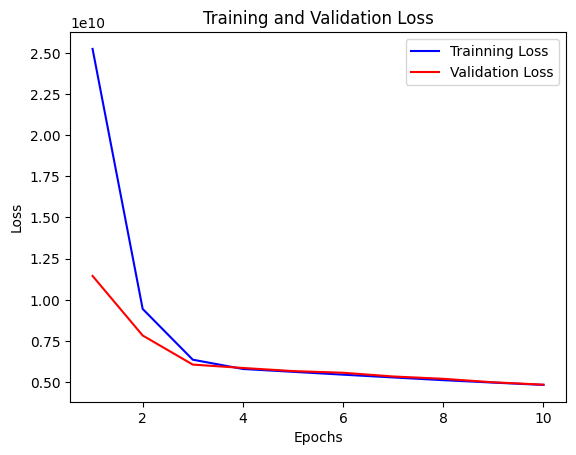

In [27]:
# plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Trainning Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# show the plot

plt.show()

511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


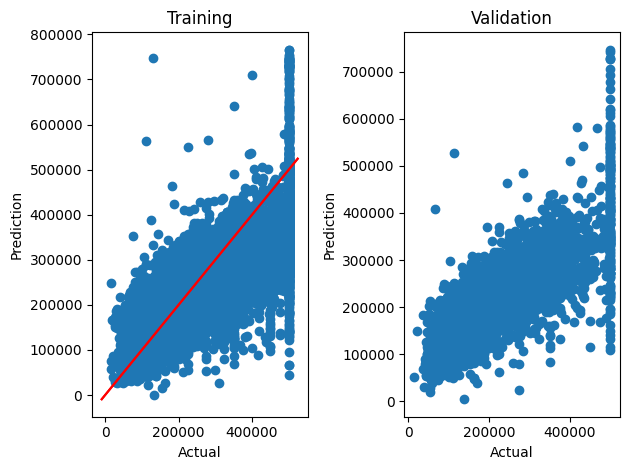

In [28]:
# specify the dimension
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results

axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Prediction', fontsize=10)
axes[1].set_title('Validation')

# Add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[0].plot(x, x, color='red')


# Tight Layout
fig.tight_layout()
plt.show()


In [29]:
# Predictive System

def pred(longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity):
    features = np.array([longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity])
    features_scaled = min_max_scaler.fit_transform([features])
    result = model.predict(features_scaled).reshape(1,-1)
    return result

In [30]:
df.iloc[0]

longitude               -122.2300
latitude                  37.8800
housing_median_age        41.0000
total_rooms              880.0000
total_bedrooms           129.0000
population               322.0000
households               126.0000
median_income              8.3252
median_house_value    452600.0000
ocean_proximity            3.0000
Name: 0, dtype: float64

In [31]:
longitude = -122.2300
latitude = 37.8800
housing_median_age = 41.0000
total_rooms = 880.0000
total_bedrooms = 129.0000
population = 322.0000
households = 126.0000
median_income = 8.3252
median_house_value = 452600.0000
ocean_proximity = 3.0000

price = pred(longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [32]:
price

array([[266133.44]], dtype=float32)

In [35]:
#save the model
model.save("model_ann.keras")

import pickle
pickle.dump(min_max_scaler,open('scaler.pkl','wb'))


In [5]:
import sklearn
import tensorflow as tf
import keras

print("scikit-learn version: ", sklearn.__version__)
print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)

scikit-learn version:  1.5.2
TensorFlow version:  2.17.0
Keras version:  3.4.1
